In [22]:
import os
import pydub
import matplotlib.pyplot as plt

In [10]:
voice_1 = pydub.AudioSegment.from_file('raw_data/parisa.ogg')


In [11]:
voice_1

In [12]:
voice_1.export('parisa.wav')

<_io.BufferedRandom name='parisa.wav'>

In [13]:
voice_1 = pydub.AudioSegment.from_file("raw_data/khadijeh_1.ogg")
voice_2 = pydub.AudioSegment.from_file("raw_data/khadijeh_2.ogg")

result = voice_1 + voice_2

result.export("data/khadijeh.ogg")

<_io.BufferedRandom name='data/khadijeh.ogg'>

In [14]:
voice_1 = pydub.AudioSegment.from_file("raw_data/mona.m4a")

voice_1.export("data/mona.ogg")

<_io.BufferedRandom name='data/mona.ogg'>

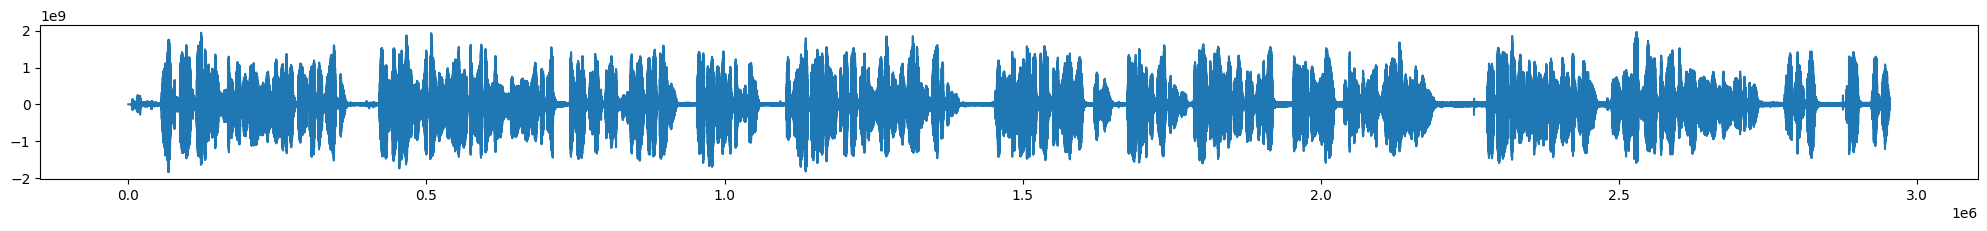

In [18]:
#  Matplatlib only accepts numpy array type inputs

voice_1 = pydub.AudioSegment.from_file("data\mohadeseh.ogg")

# type(voice_1)

# pydub.audio_segment.AudioSegment to numpy array

voice_2 = voice_1.get_array_of_samples()

# type(voice_2)

plt.figure(figsize=(25, 2))
plt.plot(voice_2)
plt.show()

In [19]:
parts = pydub.silence.split_on_silence(voice_1)

parts

In [ ]:
files = os.listdir("data")
# print(files)

for file in files :
    audio = pydub.AudioSegment.from_file(os.path.join("data", file))
    
    audio_array = audio.get_array_of_samples()

    plt.figure(figsize=(30,3))
    plt.plot(audio_array)
    plt.show()

    chunks = pydub.silence.split_on_silence(audio, min_silence_len=1650, silence_thresh= -55)
    result = sum(chunks)
    file_name = file.split(".")[0]
    result.export("wav_data/"+file_name+".wav")

In [31]:
for file in os.listdir("wav_data"):
    audio = pydub.AudioSegment.from_file(os.path.join("wav_data", file))
    
    name = file.split(".")[0]
    os.makedirs(os.path.join("dataset", name), exist_ok=True)

    chunks = pydub.utils.make_chunks(audio, 2000)

    for i , chunk in enumerate(chunks):
        if len(chunk) < 2000 :
            continue
        chunk.export(os.path.join("dataset", name, f"voice{i}.wav"), format="wav")

